# 01 EDA — LabelCraft 2025
План:

* подготовить директорию для данных (DATA_DIR);

* загрузить train / test / categories;

* посмотреть базовую структуру (head, info, распределение целей);

* собрать текстовое поле text для baseline‑модели.


# Загрузка данных

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os
import pandas as pd
import numpy as np

pd.set_option("display.max_colwidth", 200)
pd.set_option("display.max_columns", 50)

print("Setup OK")

Setup OK


In [6]:
DATA_DIR = "/content/drive/MyDrive/LabelCraft_2025/data"

train_path = os.path.join(DATA_DIR, "train.csv")
test_path = os.path.join(DATA_DIR, "test.csv")
categories_path = os.path.join(DATA_DIR, "categories.csv")

print("DATA_DIR:", DATA_DIR)
print("train_path:", train_path)
print("test_path:", test_path)
print("categories_path:", categories_path)

DATA_DIR: /content/drive/MyDrive/LabelCraft_2025/data
train_path: /content/drive/MyDrive/LabelCraft_2025/data/train.csv
test_path: /content/drive/MyDrive/LabelCraft_2025/data/test.csv
categories_path: /content/drive/MyDrive/LabelCraft_2025/data/categories.csv


In [7]:
import os

os.makedirs(DATA_DIR, exist_ok=True)
print("Files in DATA_DIR:", os.listdir(DATA_DIR))

Files in DATA_DIR: ['category_tree.csv', 'labeled_train.parquet', 'unlabeled_special_prize.parquet', 'unlabeled_train.parquet']


In [8]:
import os
import pandas as pd

DATA_DIR = "/content/drive/MyDrive/LabelCraft_2025/data" # путь к папке с файлами

train_path = os.path.join(DATA_DIR, "labeled_train.parquet")
unlabeled_path = os.path.join(DATA_DIR, "unlabeled_train.parquet")
unlabeled_sp_path = os.path.join(DATA_DIR, "unlabeled_special_prize.parquet")
categories_path = os.path.join(DATA_DIR, "category_tree.csv")

print("DATA_DIR:", DATA_DIR)
print("train_path:", train_path)
print("unlabeled_path:", unlabeled_path)
print("unlabeled_sp_path:", unlabeled_sp_path)
print("categories_path:", categories_path)

DATA_DIR: /content/drive/MyDrive/LabelCraft_2025/data
train_path: /content/drive/MyDrive/LabelCraft_2025/data/labeled_train.parquet
unlabeled_path: /content/drive/MyDrive/LabelCraft_2025/data/unlabeled_train.parquet
unlabeled_sp_path: /content/drive/MyDrive/LabelCraft_2025/data/unlabeled_special_prize.parquet
categories_path: /content/drive/MyDrive/LabelCraft_2025/data/category_tree.csv


In [9]:
os.makedirs(DATA_DIR, exist_ok=True)
print("Files in DATA_DIR:", os.listdir(DATA_DIR))

train = pd.read_parquet(train_path)
unlabeled = pd.read_parquet(unlabeled_path)
unlabeled_sp = pd.read_parquet(unlabeled_sp_path)
cat_tree = pd.read_csv(categories_path)

print("train:", train.shape)
print("unlabeled:", unlabeled.shape)
print("unlabeled_special_prize:", unlabeled_sp.shape)
print("category_tree:", cat_tree.shape)

Files in DATA_DIR: ['category_tree.csv', 'labeled_train.parquet', 'unlabeled_special_prize.parquet', 'unlabeled_train.parquet']
train: (716552, 4)
unlabeled: (784742, 3)
unlabeled_special_prize: (24653, 4)
category_tree: (1896, 3)


In [10]:
print("train columns:", train.columns.tolist())
print("category_tree columns:", cat_tree.columns.tolist())

train.head()

train columns: ['hash_id', 'source_name', 'attributes', 'cat_id']
category_tree columns: ['cat_id', 'parent_id', 'cat_name']


,hash_id,source_name,attributes,cat_id
0,00002c14676b6a5c02d01fd82a92bd50,"Бойник барабана для стиральной машины Candy, Vestel, Bompani, Whirlpool","[{""""attribute_id"""":8,""""attribute_name"""":""""Поставщик"""",""""attribute_value"""":""""Нет бренда""""},{""""attribute_id"""":14,""""attribute_name"""":""""Возможность самовывоза"""",""""attribute_value"""":""""Да""""},{""""attribut...",10501
1,00002d434ee4516d75b9e99cb4b6b4fb,Приемное устройство М1 TDM Уютный дом в монтажную коробку для беспроводного управления нагрузкой 2300Вт дальность 30м SQ1508-0213,"[{""""attribute_id"""":8,""""attribute_name"""":""""Поставщик"""",""""attribute_value"""":""""TDM Electric""""},{""""attribute_id"""":14,""""attribute_name"""":""""Возможность самовывоза"""",""""attribute_value"""":""""Да""""},{""""attrib...",140
2,000055da1f1a715b7a8c955e4002ade2,Духовой шкаф электрический Darina 1U5 BDE 112 708 X5 серебристый (000057011),"[{""""attribute_id"""":6,""""attribute_name"""":""""Штрихкод"""",""""attribute_value"""":""""4607152046304""""},{""""attribute_id"""":8,""""attribute_name"""":""""Поставщик"""",""""attribute_value"""":""""DARINA""""},{""""attribute_id"""":1...",1397
3,000065493de83bdbacf9093b9e139cbb,Коврик для мыши 40*70 см Genshin Impact Desk Mat Zephyr of the Violet Garden 6975213683170,"[{""""attribute_id"""":8,""""attribute_name"""":""""Поставщик"""",""""attribute_value"""":""""Genshin Impact""""},{""""attribute_id"""":14,""""attribute_name"""":""""Возможность самовывоза"""",""""attribute_value"""":""""Да""""},{""""attr...",3645
4,00006bee8d0f6056ac09833a2cee2b8c,"Ripo Кабель для интернет-соединения, серый","[{""""attribute_id"""":8,""""attribute_name"""":""""Поставщик"""",""""attribute_value"""":""""Ripo""""},{""""attribute_id"""":14,""""attribute_name"""":""""Возможность самовывоза"""",""""attribute_value"""":""""Да""""},{""""attribute_id""""...",10421


# Собираем текст для baseline: название + атрибуты

In [11]:
train["source_name"] = train["source_name"].fillna("")
train["attributes"] = train["attributes"].fillna("")

train["text"] = train["source_name"] + " " + train["attributes"]

print("train columns:", train.columns.tolist())
print("Пример текстового поля:")
print(train["text"].head(5))

train columns: ['hash_id', 'source_name', 'attributes', 'cat_id', 'text']
Пример текстового поля:
0    Бойник барабана для стиральной машины Candy, Vestel, Bompani, Whirlpool [{""attribute_id"":8,""attribute_name"":""Поставщик"",""attribute_value"":""Нет бренда""},{""attribute_id"":14,""attribute_n...
1    Приемное устройство М1 TDM Уютный дом в монтажную коробку для беспроводного управления нагрузкой 2300Вт дальность 30м SQ1508-0213 [{""attribute_id"":8,""attribute_name"":""Поставщик"",""attribute_...
2    Духовой шкаф электрический Darina 1U5 BDE 112 708 X5 серебристый (000057011) [{""attribute_id"":6,""attribute_name"":""Штрихкод"",""attribute_value"":""4607152046304""},{""attribute_id"":8,""attri...
3    Коврик для мыши 40*70 см Genshin Impact Desk Mat Zephyr of the Violet Garden 6975213683170 [{""attribute_id"":8,""attribute_name"":""Поставщик"",""attribute_value"":""Genshin Impact""},{""attribut...
4    Ripo Кабель для интернет-соединения, серый [{""attribute_id"":8,""attribute_n

# Смотрим распределение целевой категории

In [12]:
cat_counts = train["cat_id"].value_counts()
print("Всего уникальных категорий:", cat_counts.shape)
print("Топ-20 самых частых категорий:")
print(cat_counts.head(20))

Всего уникальных категорий: (776,)
Топ-20 самых частых категорий:
cat_id
1030     78850
10421    36567
1006     32567
1370     26766
10506    23152
10501    19999
31406    19210
1054     15828
10339    14882
1242     14429
1081     13085
1003     12557
10354    10995
31419     9984
2433      9409
1025      9303
1367      9047
14134     8897
1260      8742
1375      8472
Name: count, dtype: int64


# Присоединяем названия категорий

In [13]:
train = train.merge(cat_tree[["cat_id", "cat_name"]], on="cat_id", how="left")

print("После merge, train columns:", train.columns.tolist())
print("Примеры (cat_id, cat_name, text):")
print(train[["cat_id", "cat_name", "text"]].head(5))

После merge, train columns: ['hash_id', 'source_name', 'attributes', 'cat_id', 'text', 'cat_name']
Примеры (cat_id, cat_name, text):
   cat_id                              cat_name  \
0   10501       Аксессуары для стиральных машин   
1     140                             Умный дом   
2    1397            Духовые шкафы встраиваемые   
3    3645                     Коврики для мышек   
4   10421  Кабели, разъемы для ПК и электроники   

                                                                                                                                                                                                      text  
0  Бойник барабана для стиральной машины Candy, Vestel, Bompani, Whirlpool [{""attribute_id"":8,""attribute_name"":""Поставщик"",""attribute_value"":""Нет бренда""},{""attribute_id"":14,""attribute_n...  
1  Приемное устройство М1 TDM Уютный дом в монтажную коробку для беспроводного управления нагрузкой 2300Вт дальность 30м SQ1508-0213 [{""attribute_id"

# Быстрая проверка пропусков в cat_name

In [14]:
missing_names = train["cat_name"].isna().sum()
print("Строк без имени категории (cat_name is NaN):", missing_names)

Строк без имени категории (cat_name is NaN): 0


# Распределение частот категорий (в текстовом виде)

In [15]:
import numpy as np

cat_counts = train["cat_id"].value_counts()

print("Всего категорий:", len(cat_counts))
print("Топ-10 категорий по числу товаров:")
print(cat_counts.head(10))

print("\nДоля топ-10 категорий от всех товаров:")
print(cat_counts.head(10).sum() / len(train))

print("\nДоля топ-50 категорий от всех товаров:")
print(cat_counts.head(50).sum() / len(train))

Всего категорий: 776
Топ-10 категорий по числу товаров:
cat_id
1030     78850
10421    36567
1006     32567
1370     26766
10506    23152
10501    19999
31406    19210
1054     15828
10339    14882
1242     14429
Name: count, dtype: int64

Доля топ-10 категорий от всех товаров:
0.3939002333396599

Доля топ-50 категорий от всех товаров:
0.7444065469079704


# Приблизительная длина текстов

Количество символов и слов в text

In [16]:
train["text_len_chars"] = train["text"].str.len()
train["text_len_words"] = train["text"].str.split().str.len()

print("Средняя длина текста (символы):", train["text_len_chars"].mean())
print("Медиана длины текста (символы):", train["text_len_chars"].median())

print("Средняя длина текста (слова):", train["text_len_words"].mean())
print("Медиана длины текста (слова):", train["text_len_words"].median())

Средняя длина текста (символы): 1189.2071671002243
Медиана длины текста (символы): 1485.0
Средняя длина текста (слова): 29.004662606482153
Медиана длины текста (слова): 27.0


Примеры самых длинных текстов

In [17]:
print("\nПримеры длинных текстов:")
print(train[["text_len_words", "cat_name", "text"]].sort_values("text_len_words", ascending=False).head(3))


Примеры длинных текстов:
        text_len_words             cat_name  \
342518            2448  Аксессуары для плит   
71777             2339  Аксессуары для плит   
12829             1501      Водонагреватели   

                                                                                                                                                                                                           text  
342518  Жиклер для плит D53мм Gefest PS 20001-00-065 [{""attribute_id"":8,""attribute_name"":""Поставщик"",""attribute_value"":""Gefest""},{""attribute_id"":14,""attribute_name"":""Возможность самовывоза"...  
71777   Клапан электромагнитный крана газовой плиты Gefest 20900/31 [{""attribute_id"":8,""attribute_name"":""Поставщик"",""attribute_value"":""Gefest""},{""attribute_id"":14,""attribute_name"":""Возможно...  
12829   Электрический кабель с УЗО длина 1000mm Ariston 65150965 [{""attribute_id"":8,""attribute_name"":""Поставщик"",""attribute_value"":""Ariston""},{""

Визуальное представление

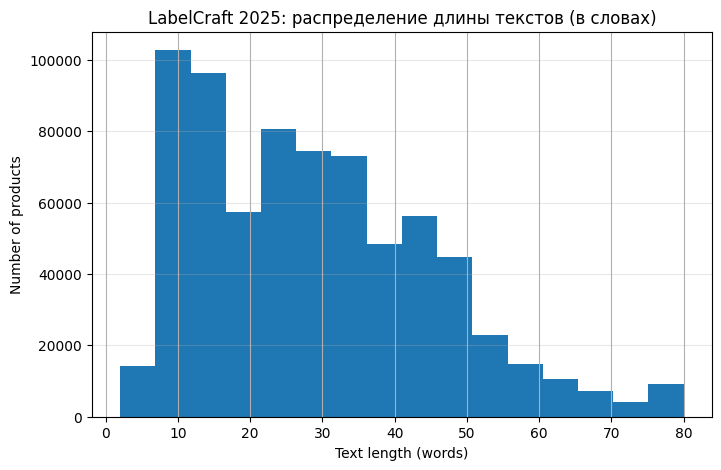

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
# Ограничим ось до, скажем, 0–80 слов
train["text_len_words"].clip(upper=80).hist(bins=16)

plt.xlabel("Text length (words)")
plt.ylabel("Number of products")
plt.title("LabelCraft 2025: распределение длины текстов (в словах)")
plt.grid(axis="y", alpha=0.3)
plt.show()

# Очищаем text: обрежем по длине и уберём лишние пробелы

In [19]:
MAX_WORDS = 128 # простое ограничение для baseline

def truncate_text(s, max_words=MAX_WORDS):
    if not isinstance(s, str):
        return ""
    words = s.split()
    if len(words) <= max_words:
        return s
        return " ".join(words[:max_words])

train["text_clean"] = train["text"].apply(truncate_text)

print("Пример очищенного текста:")
print(train["text_clean"].head(3))

Пример очищенного текста:
0    Бойник барабана для стиральной машины Candy, Vestel, Bompani, Whirlpool [{""attribute_id"":8,""attribute_name"":""Поставщик"",""attribute_value"":""Нет бренда""},{""attribute_id"":14,""attribute_n...
1    Приемное устройство М1 TDM Уютный дом в монтажную коробку для беспроводного управления нагрузкой 2300Вт дальность 30м SQ1508-0213 [{""attribute_id"":8,""attribute_name"":""Поставщик"",""attribute_...
2    Духовой шкаф электрический Darina 1U5 BDE 112 708 X5 серебристый (000057011) [{""attribute_id"":6,""attribute_name"":""Штрихкод"",""attribute_value"":""4607152046304""},{""attribute_id"":8,""attri...
Name: text_clean, dtype: object


# Простой TF-IDF + Logistic Regression baseline

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import numpy as np

Берём подвыборку для baseline

In [21]:
sample = train.sample(n=30_000, random_state=42)

Убираем классы, которые в sample встретились только 1 раз

In [22]:
counts = sample["cat_id"].value_counts()
valid_cats = counts[counts >= 2].index
sample = sample[sample["cat_id"].isin(valid_cats)].copy()

Гарантируем корректный текст

In [23]:
sample["text_clean"] = sample["text_clean"].fillna("").astype(str)

X_text = sample["text_clean"].values
y = sample["cat_id"].values

print("Размер sample после фильтрации редких классов:", sample.shape)
print("Минимальная частота класса:", sample["cat_id"].value_counts().min())

X_train, X_valid, y_train, y_valid = train_test_split(
X_text, y, test_size=0.2, random_state=42, stratify=y
)

print("Размер sample после фильтрации редких классов:", sample.shape)
print("Минимальная частота класса:", sample["cat_id"].value_counts().min())

X_train, X_valid, y_train, y_valid = train_test_split(
X_text, y, test_size=0.2, random_state=42, stratify=y
)

vectorizer = TfidfVectorizer(
max_features=50_000,
ngram_range=(1, 1),
min_df=5
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_valid_tfidf = vectorizer.transform(X_valid)

clf = LogisticRegression(
max_iter=150,
n_jobs=-1,
verbose=1,
multi_class="multinomial"
)

clf.fit(X_train_tfidf, y_train)

y_pred = clf.predict(X_valid_tfidf)

macro_f1 = f1_score(y_valid, y_pred, average="macro")
micro_f1 = f1_score(y_valid, y_pred, average="micro")

print("Baseline TF-IDF + LogisticRegression:")
print(" macro F1:", macro_f1)
print(" micro F1:", micro_f1)

Размер sample после фильтрации редких классов: (29942, 9)
Минимальная частота класса: 2
Размер sample после фильтрации редких классов: (29942, 9)
Минимальная частота класса: 2


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Baseline TF-IDF + LogisticRegression:
 macro F1: 0.37196998270846743
 micro F1: 0.8293538153281015
